## Let's get some tools installed.

Following the steps (modified) from http://www.phytools.org/eqg/Exercise_3.2/

In [5]:
if (!require('ctv')) {
    # this install is pretty quick
    install.packages('ctv', repos = 'http://cran.r-project.org/')
}
library('ctv')


The downloaded binary packages are in
	/var/folders/bm/hwt7p96n2_ngh1_pr8g7dl2m0000gn/T//Rtmpe4Wc5D/downloaded_packages


In [131]:
install.views('Phylogenetics', repos = 'http://cran.r-project.org/')

Warning message:
: dependencies ‘Biostrings’, ‘phyloseq’ are not availablePackage which is only available in source form, and may need
  compilation of C/C++/Fortran: ‘SigTree’



The downloaded binary packages are in
	/var/folders/bm/hwt7p96n2_ngh1_pr8g7dl2m0000gn/T//Rtmpe4Wc5D/downloaded_packages


installing the source packages ‘pmc’, ‘SigTree’

Warning message:
In install.packages(pkgs[[i]], repos = names(pkgs)[i], ...): installation of package ‘SigTree’ had non-zero exit status


The downloaded source packages are in
	‘/private/var/folders/bm/hwt7p96n2_ngh1_pr8g7dl2m0000gn/T/Rtmpe4Wc5D/downloaded_packages’


This installed (most of) a bundle of phylo-related R packages. Now let's tinker with `phylo` structures.

In [132]:
library(ape)
tree <- rtree(n=20)
tree


Phylogenetic tree with 20 tips and 19 internal nodes.

Tip labels:
	t11, t6, t19, t9, t8, t14, ...

Rooted; includes branch lengths.

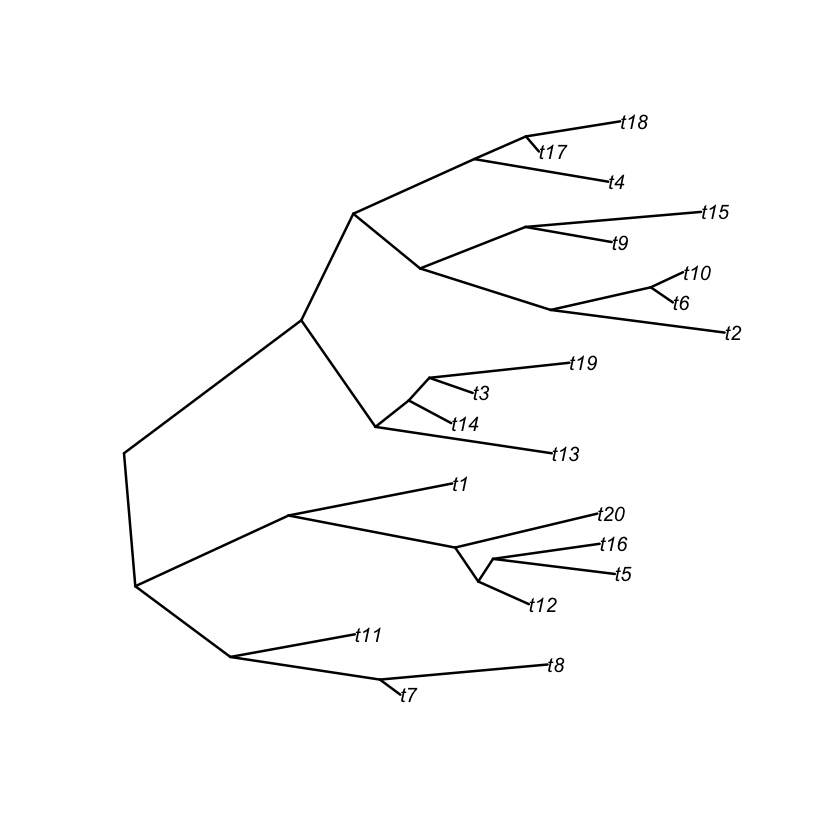

In [16]:
plot(tree, type = 'cladogram', edge.width = 2)

In [20]:
str(tree)

List of 4
 $ edge       : int [1:38, 1:2] 21 22 23 24 24 23 22 25 26 27 ...
 $ tip.label  : chr [1:20] "t7" "t8" "t11" "t12" ...
 $ edge.length: num [1:38] 0.063 0.53 0.834 0.114 0.934 ...
 $ Nnode      : int 19
 - attr(*, "class")= chr "phylo"
 - attr(*, "order")= chr "cladewise"


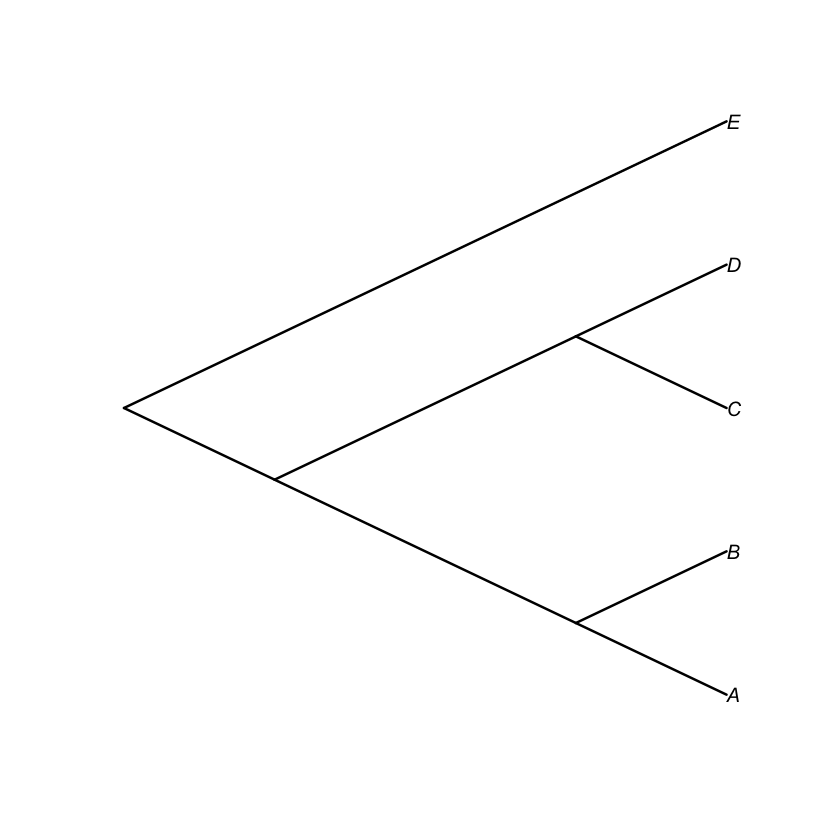

In [133]:
tree <- read.tree(text = "(((A,B),(C,D)),E);")
plot(tree, type = "cladogram", edge.width = 2)

In [22]:
tree


Phylogenetic tree with 5 tips and 4 internal nodes.

Tip labels:
[1] "A" "B" "C" "D" "E"

Rooted; no branch lengths.

In [23]:
str(tree)

List of 3
 $ edge     : int [1:8, 1:2] 6 7 8 8 7 9 9 6 7 8 ...
 $ tip.label: chr [1:5] "A" "B" "C" "D" ...
 $ Nnode    : int 4
 - attr(*, "class")= chr "phylo"
 - attr(*, "order")= chr "cladewise"


In [24]:
tree$edge

6,7
7,8
8,1
8,2
7,9
9,3
9,4
6,5


In [25]:
tree$tip.label

[1] "A" "B" "C" "D" "E"

In [26]:
tree$Nnode

[1] 4

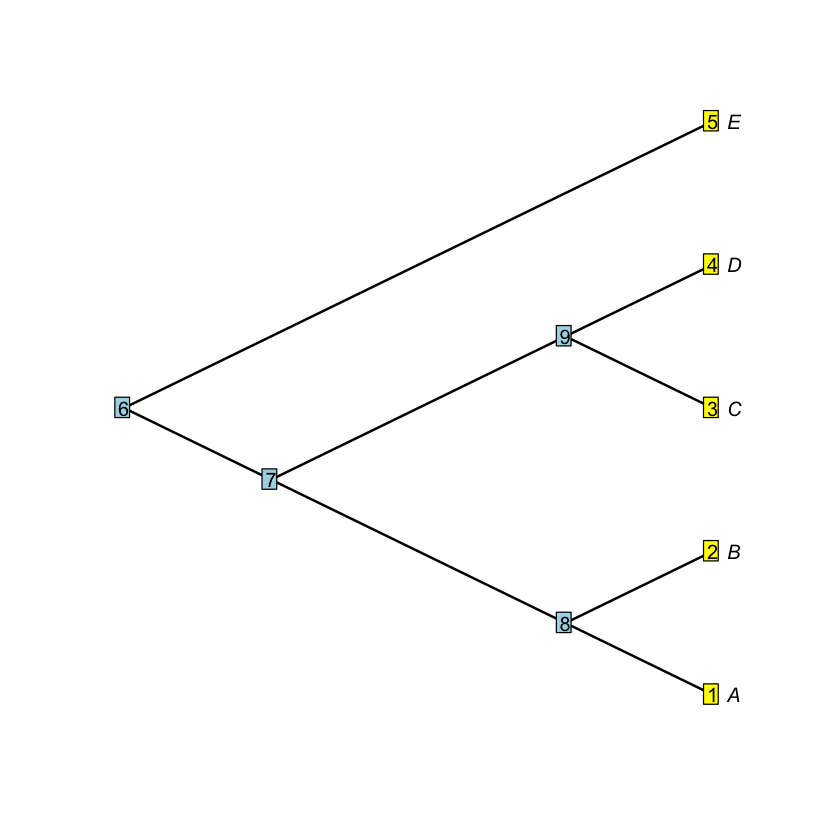

In [30]:
plot(tree, edge.width = 2, label.offset = 0.1, type = "cladogram")
nodelabels()
tiplabels()
# N.B. these must be called here to render labels!

In [34]:
is.binary.tree(tree)

[1] TRUE

In [42]:
library(jsonlite)
# N.B. 'mtcars' is a built-in sample data frame
x <- toJSON(mtcars, pretty=TRUE)
cat(x)

[
  {
    "mpg": 21,
    "cyl": 6,
    "disp": 160,
    "hp": 110,
    "drat": 3.9,
    "wt": 2.62,
    "qsec": 16.46,
    "vs": 0,
    "am": 1,
    "gear": 4,
    "carb": 4,
    "_row": "Mazda RX4"
  },
  {
    "mpg": 21,
    "cyl": 6,
    "disp": 160,
    "hp": 110,
    "drat": 3.9,
    "wt": 2.875,
    "qsec": 17.02,
    "vs": 0,
    "am": 1,
    "gear": 4,
    "carb": 4,
    "_row": "Mazda RX4 Wag"
  },
  {
    "mpg": 22.8,
    "cyl": 4,
    "disp": 108,
    "hp": 93,
    "drat": 3.85,
    "wt": 2.32,
    "qsec": 18.61,
    "vs": 1,
    "am": 1,
    "gear": 4,
    "carb": 1,
    "_row": "Datsun 710"
  },
  {
    "mpg": 21.4,
    "cyl": 6,
    "disp": 258,
    "hp": 110,
    "drat": 3.08,
    "wt": 3.215,
    "qsec": 19.44,
    "vs": 1,
    "am": 0,
    "gear": 3,
    "carb": 1,
    "_row": "Hornet 4 Drive"
  },
  {
    "mpg": 18.7,
    "cyl": 8,
    "disp": 360,
    "hp": 175,
    "drat": 3.15,
    "wt": 3.44,
    "qsec": 17.02,
    "vs": 0,
    "am": 0,
    "gear": 3,
    "carb": 

OK, so let's try a straightforward conversion using the pattern above:

In [53]:
toJSON(tree, pretty=TRUE)

ERROR: Error: No method asJSON S3 class: phylo


**No dice!** If only there was a way to force a liberal interpretation of obscure classes. (SPOILER: There is.)

In [51]:
toJSON(tree, force=TRUE)

{"edge":[[6,7],[7,8],[8,1],[8,2],[7,9],[9,3],[9,4],[6,5]],"tip.label":["A","B","C","D","E"],"Nnode":[4]} 

Is that all there is in `tree` !? It just doesn't seem like enough data. But it's true! See [this explanation]().

In [52]:
str(tree)

List of 3
 $ edge     : int [1:8, 1:2] 6 7 8 8 7 9 9 6 7 8 ...
 $ tip.label: chr [1:5] "A" "B" "C" "D" ...
 $ Nnode    : int 4
 - attr(*, "class")= chr "phylo"
 - attr(*, "order")= chr "cladewise"


If `force` won't do the trick for some reason, [here's an example of how to walk an R object](http://stackoverflow.com/a/24831341) piecemeal and serialize its parts more selectively. 

For more background, here are [the design objectives of the **jsonlite** R package](http://www.r-bloggers.com/new-package-jsonlite-a-smarter-json-encoderdecoder/) and a wonderful "package vignette" that [describes its class-based (de)serialization](https://cran.r-project.org/web/packages/jsonlite/vignettes/json-mapping.pdf) in detail. Here they briefly mention adding methods for new classes:

>  Users in R can extend this system by implementing additional methods for other classes.

It's a bit hazy on how this could be implemented, but the [jsonlite source seems to be on GitHub](https://github.com/jeroenooms/jsonlite). But [this discussion in their issue tracker](https://github.com/jeroenooms/jsonlite/issues/62) tells me that this extensibility was a hoped-for feature they've been unable to deliver. 

Still, it offers an intriguing possibility: **We could write `toJSON`/`fromJSON` for phylo objects, using NexSON as the serialization schema in JSON!** I'm not sure this is a good idea, but it's food for thought.

We can do more piecemeal conversion using [flexible functions like `lapply()`](http://stackoverflow.com/questions/16947643/getting-imported-json-data-into-a-data-frame-in-r) or by borrowing (de)serialization innards from jsonlite like so:

In [69]:
temp.string = jsonlite::serializeJSON(x=list("foo",2))
temp.string

[1] "{\"type\":\"list\",\"attributes\":{},\"value\":[{\"type\":\"character\",\"attributes\":{},\"value\":[\"foo\"]},{\"type\":\"double\",\"attributes\":{},\"value\":[2]}]}"

In [70]:
temp.restored = jsonlite::unserializeJSON(temp.string)
str(temp.restored)

List of 2
 $ : chr "foo"
 $ : num 2


Anyway, we might never use this. Let's move on.

## Importing the Tree Illustrator!

So it turns out "magics" like `%%javascript` are really specific to the IPython **kernel**, and there are no plans to implement them in the R kernel. I struggled with how to inject Javascript in an R notebook, and finally stumbled onto an example of simply echoing the `SCRIPT` tag as a string. Since R is so naive about Javascript, it simply parrots the markup into the cell's output and the script runs!

In [34]:
# To use Javascript in an R notebook, just spell it out and run the cell!
'<SCRIPT TYPE="text/javascript">
    var element = $(IPython.notebook.container).find(".cell.running .output_subarea");
    //$.getScript("//rawgit.com/OpenTreeOfLife/tree-illustrator/1a5e8db/stylist/ipynb-tree-illustrator.js",
    $.getScript("//rawgit.com/OpenTreeOfLife/tree-illustrator/cfbfbc5/stylist/ipynb-tree-illustrator.js",
        function() {
            /* This function is called once the IPythonTreeIllustrator module has loaded. 
             * N.B. we mimic the `element` value (a jQuery selection of the output area of
             * this cell) defined by %%javascript magic, which is only available in the 
             * IPython kernel. 
             */
            IPythonTreeIllustrator.initNotebookUI(element);
        }
    );
</SCRIPT>'

[1] "<SCRIPT TYPE=\"text/javascript\">\n    var element = $(IPython.notebook.container).find(\".cell.running .output_subarea\");\n    //$.getScript(\"//rawgit.com/OpenTreeOfLife/tree-illustrator/1a5e8db/stylist/ipynb-tree-illustrator.js\",\n    $.getScript(\"//rawgit.com/OpenTreeOfLife/tree-illustrator/cfbfbc5/stylist/ipynb-tree-illustrator.js\",\n        function() {\n            /* This function is called once the IPythonTreeIllustrator module has loaded. \n             * N.B. we mimic the `element` value (a jQuery selection of the output area of\n             * this cell) defined by %%javascript magic, which is only available in the \n             * IPython kernel. \n             */\n            IPythonTreeIllustrator.initNotebookUI(element);\n        }\n    );\n</SCRIPT>"

Now we can launch the Tree Illustrator and try (fail) to load R variables. So it's time to add that option to [**ipynb-tree-illustrator.js**](https://github.com/OpenTreeOfLife/tree-illustrator/blob/7c49044b508168ecd9a44ca7525b4841171f4e43/stylist/ipynb-tree-illustrator.js#L631-L644)!

In [110]:
ls

function (name, pos = -1L, envir = as.environment(pos), all.names = FALSE, 
    pattern, sorted = TRUE) 
{
    if (!missing(name)) {
        pos <- tryCatch(name, error = function(e) e)
        if (inherits(pos, "error")) {
            name <- substitute(name)
            if (!is.character(name)) 
                name <- deparse(name)
            warning(gettextf("%s converted to character string", 
                sQuote(name)), domain = NA)
            pos <- name
        }
    }
    all.names <- .Internal(ls(envir, all.names, sorted))
    if (!missing(pattern)) {
        if ((ll <- length(grep("[", pattern, fixed = TRUE))) && 
            ll != length(grep("]", pattern, fixed = TRUE))) {
            if (pattern == "[") {
                pattern <- "\\["
                warning("replaced regular expression pattern '[' by  '\\\\['")
            }
            else if (length(grep("[^\\\\]\\[<-", pattern))) {
                pattern <- sub("\\[<-", "\\\\\\[<-", pattern)
                warning("replaced '[<-' by '\\\\[<-' in regular expression pattern")
            }
        }
        grep(pattern, all.names, value = TRUE)
    }
    else all.names
}
<bytecode: 0x7fc2850f9388>
<environment: namespace:base>

In [111]:
ls()

[1] "q"             "quit"          "temp.restored" "temp.string"  
[5] "tree"          "x"

In [112]:
require('OOFOO')

Loading required package: OOFOO
Warning message:
In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, : there is no package called ‘OOFOO’

In [130]:
if (!require('FOOFOO')) {
    cat(TRUE)
}


Loading required package: FOOFOO
Warning message:
In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, : there is no package called ‘FOOFOO’

TRUE

In [147]:
library(jsonlite)
.local.vars = ls()
toJSON( c(.local.vars) )

["local.vars","q","quit","temp.restored","temp.string","tree","x"] 

In [170]:
get('tree')


Phylogenetic tree with 5 tips and 4 internal nodes.

Tip labels:
[1] "A" "B" "C" "D" "E"

Rooted; no branch lengths.

In [217]:
.ti.locals = ls()
.ti.locals <- lapply( .ti.locals, function(varName) {
    print(paste("STARTING with", varName))
    varValue = get(varName)
    print(paste(">>> ", varName, " is a <", class(varValue), ">:"))
    #print(varValue)    
    return( c(varName, class(varValue), 'R') )
})

#results

[1] "STARTING with local.vars"
[1] ">>>  local.vars  is a < character >:"
[1] "STARTING with q"
[1] ">>>  q  is a < function >:"
[1] "STARTING with quit"
[1] ">>>  quit  is a < function >:"
[1] "STARTING with results"
[1] ">>>  results  is a < list >:"
[1] "STARTING with S"
[1] ">>>  S  is a < numeric >:"
[1] "STARTING with temp.restored"
[1] ">>>  temp.restored  is a < list >:"
[1] "STARTING with temp.string"
[1] ">>>  temp.string  is a < character >:"
[1] "STARTING with tree"
[1] ">>>  tree  is a < phylo >:"
[1] "STARTING with x"
[1] ">>>  x  is a < integer >:"
[1] "STARTING with Z"
[1] ">>>  Z  is a < numeric >:"


In [218]:
.ti.locals

[[1]]
[1] "local.vars" "character"  "R"         

[[2]]
[1] "q"        "function" "R"       

[[3]]
[1] "quit"     "function" "R"       

[[4]]
[1] "results" "list"    "R"      

[[5]]
[1] "S"       "numeric" "R"      

[[6]]
[1] "temp.restored" "list"          "R"            

[[7]]
[1] "temp.string" "character"   "R"          

[[8]]
[1] "tree"  "phylo" "R"    

[[9]]
[1] "x"       "integer" "R"      

[[10]]
[1] "Z"       "numeric" "R"

In [219]:
toJSON(.ti.locals, force=TRUE)

[["local.vars","character","R"],["q","function","R"],["quit","function","R"],["results","list","R"],["S","numeric","R"],["temp.restored","list","R"],["temp.string","character","R"],["tree","phylo","R"],["x","integer","R"],["Z","numeric","R"]] 

### Converting R phylo objects to NexSON for use in Tree Illustrator

At this point we have a few options:
 - write a JS converter (Vega data transform) to do this from scratch
 - teach peyotl to import R `phylo` objects and convert to NexSON
 - look for more help in R packages
 
Not surprisingly, `ape` knows how to write `phylo` objects out as Newick or NEXUS:

In [293]:
testnewick = write.tree(tree)
testnewick

[1] "(((A,B),(C,D)),E);"

In [250]:
write.nexus(tree)

#NEXUS
[R-package APE, Sat Mar 26 20:24:51 2016]

BEGIN TAXA;
	DIMENSIONS NTAX = 5;
	TAXLABELS
		A
		B
		C
		D
		E
	;
END;
BEGIN TREES;
	TRANSLATE
		1	A,
		2	B,
		3	C,
		4	D,
		5	E
	;
	TREE * UNTITLED = [&R] (((1,2),(3,4)),5);
END;


Since NEXUS is the richer of the two formats, we should **try this first** and pass the result to peyotl for conversion to NexSON.

Note that there's also a method `write.nexus.data()` to generate NEXUS from sequences (character data). We can read this directly into the Tree Illustrator, then pass it on to peyotl for conversion to NexSON. But will peyotl capture anything beyond the basic tree structure and labels? **Let's find out!**

Here are some BAMM snippets provided by @rhr:

In [299]:
# Extract DTrates from BAMM object

library(BAMMtools)
data(primates)
data(events.primates)
edata <- getEventData(primates, events.primates, burnin=0.25, type = 'trait')
dtrates = dtRates(edata, tau=0.01, tmat=T)

# tmat is the matrix of branch segments
tmat = dtrates$dtrates$tmat
# reconstructed rates. Each entry corresponds to a branch segment
rates = dtrates$dtrates$rates

Processing event data from data.frame

Discarded as burnin: GENERATIONS <  4990000
Analyzing  1501  samples from posterior

Setting recursive sequence on tree...

Done with recursive sequence



In [310]:
write.nexus(primates)

#NEXUS
[R-package APE, Sun Mar 27 17:21:57 2016]

BEGIN TAXA;
	DIMENSIONS NTAX = 233;
	TAXLABELS
		Galago_matschiei
		Euoticus_pallidus
		Euoticus_elegantulus
		Galagoides_zanzibaricus
		Galagoides_demidoff
		Galago_alleni
		Galago_senegalensis
		Galago_moholi
		Galago_gallarum
		Otolemur_garnettii
		Otolemur_crassicaudatus
		Perodicticus_potto
		Arctocebus_aureus
		Arctocebus_calabarensis
		Loris_tardigradus
		Nycticebus_pygmaeus
		Nycticebus_coucang
		Daubentonia_madagascariensis
		Lepilemur_mustelinus
		Lepilemur_septentrionalis
		Lepilemur_ruficaudatus
		Lepilemur_leucopus
		Lepilemur_edwardsi
		Lepilemur_microdon
		Lepilemur_dorsalis
		Lemur_catta
		Hapalemur_aureus
		Hapalemur_simus
		Hapalemur_griseus
		Varecia_variegata
		Eulemur_rubriventer
		Eulemur_mongoz
		Eulemur_coronatus
		Eulemur_macaco
		Eulemur_fulvus
		Avahi_laniger
		Indri_indri
		Propithecus_diadema
		Propithecus_verreauxi
		Propithecus_tattersalli
		Phaner_furcifer
		Allocebus_trichotis
		Microcebus_coquereli
		Mi

In [313]:
write.nexus(edata, file='')

#NEXUS
[R-package APE, Sun Mar 27 17:28:42 2016]



ERROR: Error in obj[[1]]$tip.label: $ operator is invalid for atomic vectors


In [315]:
write.nexus(dtrates)

#NEXUS
[R-package APE, Sun Mar 27 17:28:56 2016]



ERROR: Error in obj[[1]]$tip.label: $ operator is invalid for atomic vectors


In [326]:
class(dtrates$tip.label)

[1] "character"

In [327]:
dtrates$tip.label

[1] "Galago_matschiei"             "Euoticus_pallidus"           
  [3] "Euoticus_elegantulus"         "Galagoides_zanzibaricus"     
  [5] "Galagoides_demidoff"          "Galago_alleni"               
  [7] "Galago_senegalensis"          "Galago_moholi"               
  [9] "Galago_gallarum"              "Otolemur_garnettii"          
 [11] "Otolemur_crassicaudatus"      "Perodicticus_potto"          
 [13] "Arctocebus_aureus"            "Arctocebus_calabarensis"     
 [15] "Loris_tardigradus"            "Nycticebus_pygmaeus"         
 [17] "Nycticebus_coucang"           "Daubentonia_madagascariensis"
 [19] "Lepilemur_mustelinus"         "Lepilemur_septentrionalis"   
 [21] "Lepilemur_ruficaudatus"       "Lepilemur_leucopus"          
 [23] "Lepilemur_edwardsi"           "Lepilemur_microdon"          
 [25] "Lepilemur_dorsalis"           "Lemur_catta"                 
 [27] "Hapalemur_aureus"             "Hapalemur_simus"             
 [29] "Hapalemur_griseus"            "Varecia_variegata"           
 [31] "Eulemur_rubriventer"          "Eulemur_mongoz"              
 [33] "Eulemur_coronatus"            "Eulemur_macaco"              
 [35] "Eulemur_fulvus"               "Avahi_laniger"               
 [37] "Indri_indri"                  "Propithecus_diadema"         
 [39] "Propithecus_verreauxi"        "Propithecus_tattersalli"     
 [41] "Phaner_furcifer"              "Allocebus_trichotis"         
 [43] "Microcebus_coquereli"         "Microcebus_rufus"            
 [45] "Microcebus_murinus"           "Cheirogaleus_medius"         
 [47] "Cheirogaleus_major"           "Tarsius_dianae"              
 [49] "Tarsius_pumilus"              "Tarsius_spectrum"            
 [51] "Tarsius_syrichta"             "Tarsius_bancanus"            
 [53] "Chiropotes_satanas"           "Chiropotes_albinasus"        
 [55] "Cacajao_melanocephalus"       "Cacajao_calvus"              
 [57] "Pithecia_pithecia"            "Pithecia_irrorata"           
 [59] "Pithecia_aequatorialis"       "Pithecia_monachus"           
 [61] "Pithecia_albicans"            "Callicebus_torquatus"        
 [63] "Callicebus_modestus"          "Callicebus_oenanthe"         
 [65] "Callicebus_olallae"           "Callicebus_donacophilus"     
 [67] "Callicebus_personatus"        "Callicebus_dubius"           
 [69] "Callicebus_cupreus"           "Callicebus_caligatus"        
 [71] "Callicebus_hoffmannsi"        "Callicebus_brunneus"         
 [73] "Callicebus_moloch"            "Callicebus_cinerascens"      
 [75] "Alouatta_palliata"            "Alouatta_coibensis"          
 [77] "Alouatta_caraya"              "Alouatta_pigra"              
 [79] "Alouatta_fusca"               "Alouatta_seniculus"          
 [81] "Alouatta_sara"                "Alouatta_belzebul"           
 [83] "Ateles_paniscus"              "Ateles_belzebuth"            
 [85] "Ateles_geoffroyi"             "Ateles_fusciceps"            
 [87] "Ateles_marginatus"            "Ateles_chamek"               
 [89] "Brachyteles_arachnoides"      "Lagothrix_lagotricha"        
 [91] "Lagothrix_flavicauda"         "Cebus_olivaceus"             
 [93] "Cebus_apella"                 "Cebus_capucinus"             
 [95] "Cebus_albifrons"              "Saimiri_boliviensis"         
 [97] "Saimiri_vanzolinii"           "Saimiri_sciureus"            
 [99] "Saimiri_ustus"                "Saimiri_oerstedii"           
[101] "Aotus_lemurinus"              "Aotus_hershkovitzi"          
[103] "Aotus_vociferans"             "Aotus_brumbacki"             
[105] "Aotus_nancymaae"              "Aotus_miconax"               
[107] "Aotus_infulatus"              "Aotus_nigriceps"             
[109] "Aotus_trivirgatus"            "Aotus_azarai"                
[111] "Callimico_goeldii"            "Callithrix_pygmaea"          
[113] "Callithrix_humeralifera"      "Callithrix_argentata"        
[115] "Callithrix_flaviceps"         "Callithrix_aurita"           
[117] "Callithrix_kuhlii"            "Callithrix_geoffroyi

In [328]:
dtrates


Phylogenetic tree with 233 tips and 232 internal nodes.

Tip labels:
	Galago_matschiei, Euoticus_pallidus, Euoticus_elegantulus, Galagoides_zanzibaricus, Galagoides_demidoff, Galago_alleni, ...

Rooted; includes branch lengths.

Posterior samples: 1501 

List elements:
	 edge Nnode tip.label edge.length begin end downseq lastvisit numberEvents eventData	 eventVectors tipStates tipLambda meanTipLambda eventBranchSegs tipMu meanTipMu type dtrates

In [332]:
class(dtrates)

[1] "bammdata"

In [334]:
as.phylo(dtrates)


Phylogenetic tree with 233 tips and 232 internal nodes.

Tip labels:
	Galago_matschiei, Euoticus_pallidus, Euoticus_elegantulus, Galagoides_zanzibaricus, Galagoides_demidoff, Galago_alleni, ...

Rooted; includes branch lengths.

In [335]:
str(as.phylo(dtrates))

List of 4
 $ edge       : int [1:464, 1:2] 234 235 236 237 238 238 239 239 237 240 ...
 $ Nnode      : int 232
 $ tip.label  : chr [1:233] "Galago_matschiei" "Euoticus_pallidus" "Euoticus_elegantulus" "Galagoides_zanzibaricus" ...
 $ edge.length: num [1:464] 13.22 30.95 12.4 4.88 3.64 ...
 - attr(*, "class")= chr "phylo"
 - attr(*, "order")= chr "cladewise"


In [336]:
str(dtrates)

List of 19
 $ edge           : int [1:464, 1:2] 234 235 236 237 238 238 239 239 237 240 ...
 $ Nnode          : int 232
 $ tip.label      : chr [1:233] "Galago_matschiei" "Euoticus_pallidus" "Euoticus_elegantulus" "Galagoides_zanzibaricus" ...
 $ edge.length    : num [1:464] 13.22 30.95 12.4 4.88 3.64 ...
 $ begin          : num [1:464] 0 13.2 44.2 56.6 61.4 ...
 $ end            : num [1:464] 13.2 44.2 56.6 61.4 65.1 ...
 $ downseq        : int [1:465] 234 235 236 237 238 1 239 2 3 240 ...
 $ lastvisit      : int [1:465] 1 2 3 4 5 6 7 8 9 10 ...
 $ numberEvents   : int [1:1501] 6 11 4 4 12 5 7 7 7 10 ...
 $ eventData      :List of 1501
  ..$ :'data.frame':	6 obs. of  7 variables:
  .. ..$ node : int [1:6] 234 281 421 348 212 230
  .. ..$ time : num [1:6] 0 2.25 55.12 56.67 60.36 ...
  .. ..$ lam1 : num [1:6] 0.0905 0.0949 0.1019 0.0715 0.1397 ...
  .. ..$ lam2 : num [1:6] -0.00626 -0.03418 0.00258 -0.01041 0.00654 ...
  .. ..$ mu1  : num [1:6] 0 0 0 0 0 0
  .. ..$ mu2  : num [1:6] 0 0

In [331]:
write.nexus(as.phylo(dtrates))

#NEXUS
[R-package APE, Sun Mar 27 17:33:19 2016]

BEGIN TAXA;
	DIMENSIONS NTAX = 233;
	TAXLABELS
		Galago_matschiei
		Euoticus_pallidus
		Euoticus_elegantulus
		Galagoides_zanzibaricus
		Galagoides_demidoff
		Galago_alleni
		Galago_senegalensis
		Galago_moholi
		Galago_gallarum
		Otolemur_garnettii
		Otolemur_crassicaudatus
		Perodicticus_potto
		Arctocebus_aureus
		Arctocebus_calabarensis
		Loris_tardigradus
		Nycticebus_pygmaeus
		Nycticebus_coucang
		Daubentonia_madagascariensis
		Lepilemur_mustelinus
		Lepilemur_septentrionalis
		Lepilemur_ruficaudatus
		Lepilemur_leucopus
		Lepilemur_edwardsi
		Lepilemur_microdon
		Lepilemur_dorsalis
		Lemur_catta
		Hapalemur_aureus
		Hapalemur_simus
		Hapalemur_griseus
		Varecia_variegata
		Eulemur_rubriventer
		Eulemur_mongoz
		Eulemur_coronatus
		Eulemur_macaco
		Eulemur_fulvus
		Avahi_laniger
		Indri_indri
		Propithecus_diadema
		Propithecus_verreauxi
		Propithecus_tattersalli
		Phaner_furcifer
		Allocebus_trichotis
		Microcebus_coquereli
		Mi

OK, so coercing a `bammdata` object to `phylo` lets us generate NEXUS output. But it seems **very lossy**, unless we just need branch lengths. Let's look at the "raw" JSON for each:

In [ ]:
# This JSON output is WAAAY too big for a Jupyter notebook! We can use it on the server, 
# but do *not* attempt to render its output here!
test = toJSON(dtrates, force=TRUE)

In [350]:
gdata::object.size(test)

[1] 23072168 bytes

Yes, that's **23 MB of JSON**, which nicely chokes the Chrome browser and probably any others. What _is_ all this stuff?!

```
edge: [   // 2545 bytes
    [234,235], 
    [235,236], 
    ...
]
Nnode: [232]
tip.label: ["Galago_matschiei", "Euoticus_pallidus", ...]   // 4909 bytes
edge.length: [13.2212,30.9481,12.4017,4.8757,3.645,2.1951,1.4499,1.4499,1.1934, ...]  // 3259 bytes
begin: [0,13.2212, 44.1693, ...]  // 3672 bytes
end: [0,13.2212, 44.1693, ...]    // 3703 bytes
downseq: [234,235,236, ...]   // 1768 bytes
lastvisit: [1,2,3 ...]        // 1673 bytes
numberEvents: [6,11,4,4 ...]  // 3509 bytes
eventData: [                  // 1027938 bytes (1 MB)
    [
        {"node":234,"time":0,"lam1":0.0905,"lam2":-0.0063,"mu1":0,"mu2":0,"index":1},
        {"node":281,"time":2.2503,"lam1":0.0949,"lam2":-0.0342,"mu1":0,"mu2":0,"index":2},
        ...
    ],
    ...
]
eventVectors: [                 // 1399423 bytes (1.4 MB)
    [1,1,1, ...],
    [1,1,1, ...],
    ...
]
tipStates: [                    // 704907 bytes (700 KB)
    [1,1,1, ...],
    [1,1,1, ...],
    ...
]
tipLambda: [                    // 2413245 bytes (2.4 MB)
    [0.0602,0.0602,0.0602, ...],
    [0.0602,0.0602,0.0602, ...],
    ...
]
meanTipLambda: [                // 1624 bytes
    [0.0602,0.0602,0.0602, ...],
    [0.0602,0.0602,0.0602, ...],
    ...
]
eventBranchSegs: [[[...], ...], ...]   // 16708306 bytes (16.7 MB)
tipMu: [[...], ...]                    // 702482 bytes (700 KB)
meanTipMu: [0,0,0, ...]                // 483 bytes
type: ["trait"]                         
dtrates: {
    "tau":[0.01],
    "rates": [0.0786, ...]             // 20989 bytes (21 KB)
    "tmat": [[235,0,0.6509],[235,0.6509,1.3018], ...]  // 65456 bytes (65 KB)
    "
```

So the main culprits are `eventData`, `eventVectors`, `tipLambda`, and **especially** `eventBranchSegs` (the lion's share at almost 17 MB). 

Clearly most of this data is lost in the NEXUS output. If we want to pass JSON to the Tree Illustrator, perhaps we can weed out these fields during a piecemeal conversion to JSON. **But which are the fields we need?**

Based on [the source code for `plot.bammdata`](https://github.com/macroevolution/bammtools/blob/master/BAMMtools/R/plot.bammdata.R#L42-L65), the important information for coloring edges is contained in `dtrates$dtrates$rates`. These values must correspond to branches/edges somehow, but the numbers don't match and are not visible:

In [409]:
length(dtrates$dtrates$rates)

[1] 3042

In [410]:
dtrates$Nnode

[1] 232

Let's mimic the code in `plot.bammdata` and see what it reveals. First, what does `assignColorBreaks` really do? It seems to map an inbound range of rate values (arbitrary decimal numbers) to a set of threshold values that map to a preset palette, e.g. 16 equidistant hues in the ROYGBIV spectrum. 

In [422]:
assignColorBreaks(dtrates$dtrates$rates, NCOLORS=16)

[1] 0.008916255 0.017118564 0.025320873 0.033523182 0.041725491 0.049927800
 [7] 0.058130109 0.066332418 0.074534727 0.082737036 0.090939344 0.099141653
[13] 0.107343962 0.115546271 0.123748580 0.131950889 0.140153198

In [424]:
length(assignColorBreaks(dtrates$dtrates$rates, NCOLORS=16))

[1] 17

NOTE that it always includes the upper and lower bounds, so **the number of color break values is always `NCOLORS + 1`.** 

In [428]:
min(dtrates$dtrates$rates)

[1] 0.008916255

In [429]:
max(dtrates$dtrates$rates)

[1] 0.1401532

A close look at the SVG output of `plot.bammdata` shows that edges have been rendered as a series of short line segments (or arcs) in solid colors. A high value for `tau` results in fewer, coarser segments.

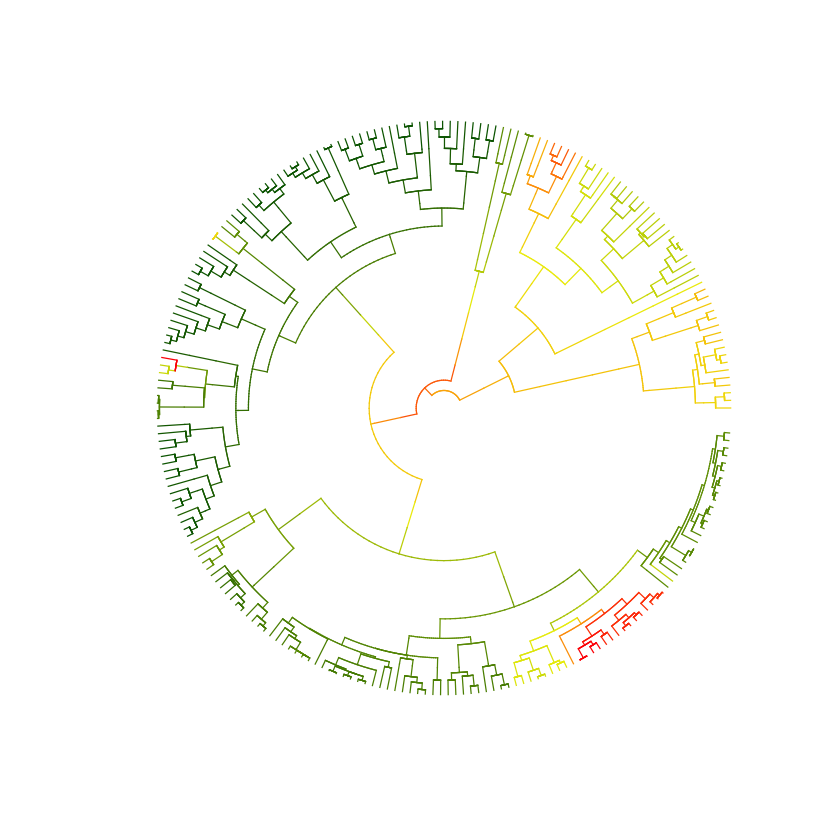

In [416]:
plot(edata, method="polar", pal=c("darkgreen","yellow2","red"),tau=0.1)

In [407]:
names(dtrates)

[1] "edge"            "Nnode"           "tip.label"       "edge.length"    
 [5] "begin"           "end"             "downseq"         "lastvisit"      
 [9] "numberEvents"    "eventData"       "eventVectors"    "tipStates"      
[13] "tipLambda"       "meanTipLambda"   "eventBranchSegs" "tipMu"          
[17] "meanTipMu"       "type"            "dtrates"

In [436]:
dtrates$dtrates$rates[[5]]

[1] 0.07627988

In [437]:
colorMap(dtrates$dtrates$rates)

ERROR: Error in eval(expr, envir, enclos): could not find function "colorMap"


Hm, it seems the interesting stuff is in method `colorMap`, which is a hidden [internal method of `BAMMtools`](https://github.com/macroevolution/bammtools/blob/bdbe8aaa0fc159c97ddefe8ce41564f8518b3148/Rcode/BAMMtools/colorMap.R).

In [453]:
?BAMMtools

BAMMtools-package          package:BAMMtools           R Documentation

_B_A_M_M_t_o_o_l_s

_D_e_s_c_r_i_p_t_i_o_n:

     An R package for the analysis and visualization of complex
     macroevolutionary dynamics. Functions in ‘BAMMtools’ are oriented
     entirely around analysis of results obtained using the ‘BAMM’
     software (‘bamm-project.org’).

_D_e_t_a_i_l_s:

       Package:  BAMMtools     
       Type:     Package       
       Version:  2.1.1         
       Date:     2016-03-02    
       License:  GPL-2 | GPL-3 
      
_A_u_t_h_o_r(_s):

     Dan Rabosky, Mike Grundler, Pascal Title, Jonathan Mitchell,
     Carlos Anderson, Jeff Shi, Joseph Brown, Huateng Huang
     Maintainer: Pascal Title <ptitle@umich.edu>

_R_e_f_e_r_e_n_c_e_s:

     <URL: bamm-project.org>

     Rabosky, D., M. Grundler, C. Anderson, P. Title, J. Shi, J. Brown,
     H. Huang and J. Larson. 2014. BAMMtools: an R package for the
     analysis of evolutionary dynamics on phylogenetic trees. Methods
     in Ecology and Evolution 5: 701-707.

     Rabosky, D. L. 2014. Automatic detection of key innovations, rate
     shifts, and diversity-dependence on phylogenetic trees. PLoS ONE
     9: e89543

     Shi, J. J., and D. L. Rabosky. 2015. Speciation dynamics during
     the global radiation of extant bats. Evolution 69: 1528-1545.

     Rabosky, D. L., F. Santini, J. T. Eastman, S. A. Smith, B. L.
     Sidlauskas, J. Chang, and M. E. Alfaro. 2013. Rates of speciation
     and morphological evolution are correlated across the largest
     vertebrate radiation. Nature Communications DOI:
     10.1038/ncomms2958